Autocorrelation

In [38]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [39]:
# read dataframe
path = '/Users/celinezhao/Downloads/wqu_assignment-main/DGS10.csv'
bond_yield = pd.read_csv(path)

In [40]:
# convert the dataframes
bond_yield['DATE2'] = pd.to_datetime(bond_yield["DATE"])
bond_yield = bond_yield[['DATE2', 'DGS10']].set_index('DATE2')
bond_yield.drop(bond_yield.tail(1).index,inplace=True)
bond_yield

,DGS10
DATE2,
2016-01-04,2.24
2016-01-05,2.25
2016-01-06,2.18
2016-01-07,2.16
2016-01-08,2.13
...,...
2019-12-25,.
2019-12-26,1.90
2019-12-27,1.88


Plots of ACF and PACF

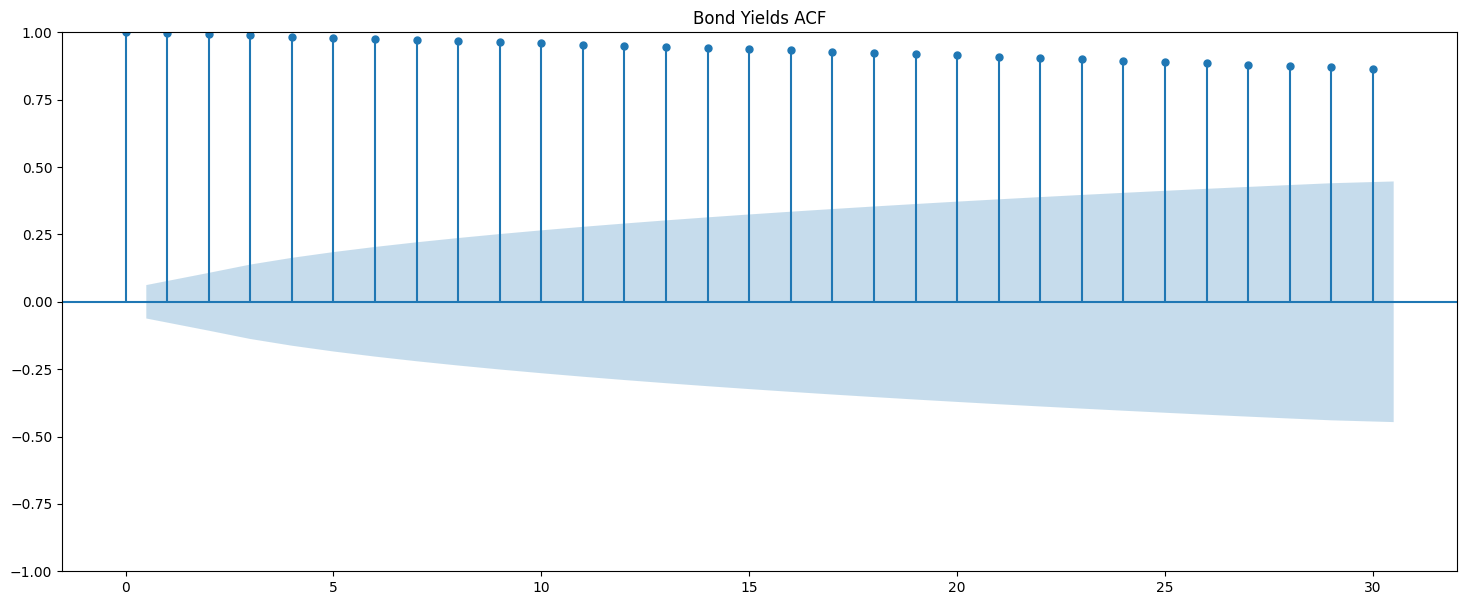

In [43]:
# Remove rows with non-numeric values in the 'DGS10' column
bond_yield = bond_yield[bond_yield['DGS10'].apply(lambda x: str(x).replace('.', '').isdigit())]
bond_yield['DGS10'] = pd.to_numeric(bond_yield['DGS10'])

# ACF Plots
fig, ax = plt.subplots(figsize=(18, 7))
sm.graphics.tsa.plot_acf(bond_yield['DGS10'], title="Bond Yields ACF", lags=30, ax=ax)
plt.show()

The starting point on the lest is 0 since the autocorrelation with 0 lag is correlatin itself, which is equal to one. It is 95% confidnece level guaranteed as the shades around 0. If the value of the x axis is over the confidnece interval(the shades), it represents a statistically significant autocorrelation.

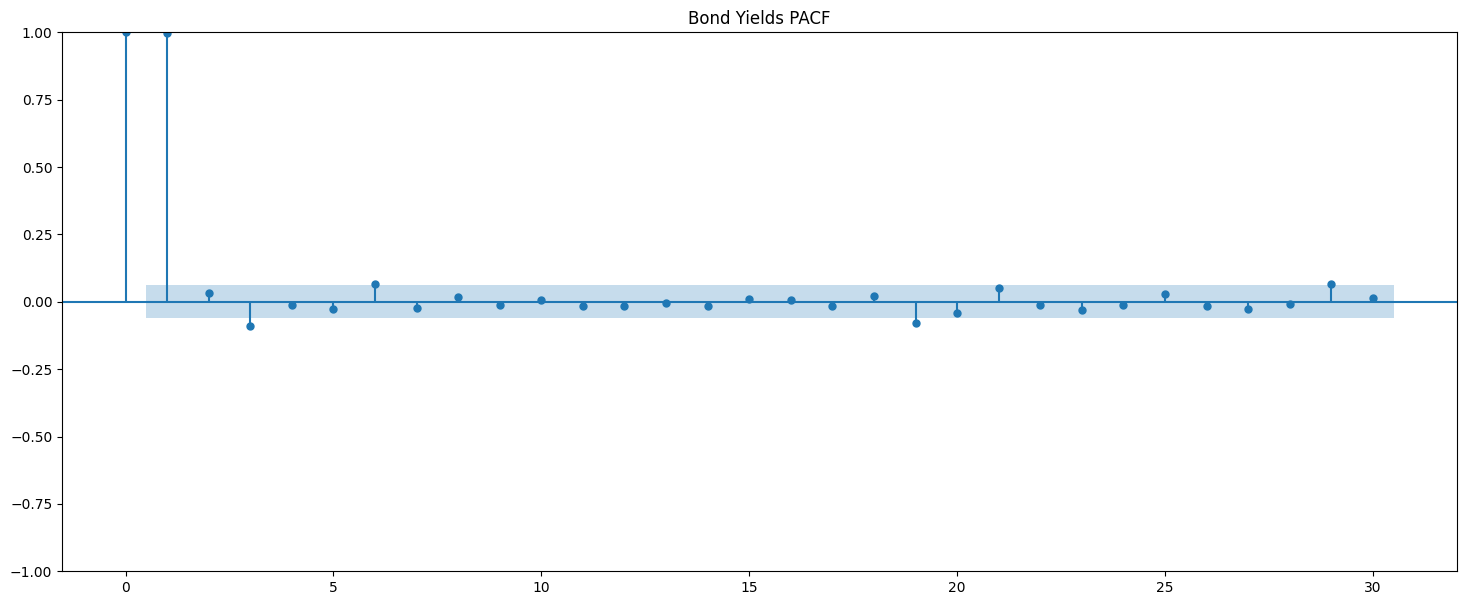

In [45]:
# PACF Plots
fig, ax = plt.subplots(figsize=(18, 7))
sm.graphics.tsa.plot_pacf(bond_yield['DGS10'], title="Bond Yields PACF", lags=30, ax=ax)
plt.show()